### 基本的な概念

線形判別分析は、データをクラスに分類するための手法です。複数のクラスが存在するデータセットがあり、新しいデータがどのクラスに属するかを予測するために使われます。

### 行列を使った説明

1. **データセットの準備**:
   各データ点は特徴量ベクトルで表されます。例えば、特徴量が2つ（$x_1$, $x_2$）の場合、データ点は $(x_1, x_2)$ という形になります。

2. **クラスごとの平均ベクトル**:
   各クラスに対して、そのクラスに属するデータ点の平均ベクトルを計算します。クラス $k$ の平均ベクトル $\mathbf{\mu}_k$ は次のように計算されます：
   $$
   \mathbf{\mu}_k = \frac{1}{N_k} \sum_{i \in C_k} \mathbf{x}_i
   $$
   ここで、$N_k$ はクラス $k$ のデータ点の数、$C_k$ はクラス $k$ に属するデータ点の集合です。

3. **クラス内散布行列**:
   各クラス内でのデータのばらつきを表す行列です。クラス $k$ のクラス内散布行列 $\mathbf{S}_k$ は次のように計算されます：
   $$
   \mathbf{S}_k = \sum_{i \in C_k} (\mathbf{x}_i - \mathbf{\mu}_k)(\mathbf{x}_i - \mathbf{\mu}_k)^T
   $$

4. **全クラスのクラス内散布行列**:
   全クラスのクラス内散布行列を合計して、全クラスのクラス内散布行列 $\mathbf{S}_W$ を求めます：
   $$
   \mathbf{S}_W = \sum_{k=1}^{K} \mathbf{S}_k
   $$

5. **クラス間散布行列**:
   各クラスの平均ベクトルと全体の平均ベクトルとの差を考慮して、クラス間のばらつきを表す行列です。全体の平均ベクトル $\mathbf{\mu}$ は次のように計算されます：
   $$
   \mathbf{\mu} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i
   $$
   クラス $k$ のクラス間散布行列 $\mathbf{S}_B$ は次のように計算されます：
   $$
   \mathbf{S}_B = \sum_{k=1}^{K} N_k (\mathbf{\mu}_k - \mathbf{\mu})(\mathbf{\mu}_k - \mathbf{\mu})^T
   $$

6. **最適な判別基準の計算**:
   LDA の目的は、クラス間のばらつきを最大化しながら、クラス内のばらつきを最小化するような線形変換を見つけることです。これを行うために、次の最適化問題を解きます：
   $$
   \mathbf{w} = \arg\max_{\mathbf{w}} \frac{\mathbf{w}^T \mathbf{S}_B \mathbf{w}}{\mathbf{w}^T \mathbf{S}_W \mathbf{w}}
   $$
   この問題を解くことで、判別基準となるベクトル $\mathbf{w}$ を得ます。このベクトルを使って、新しいデータを分類します。

### 結論

線形判別分析は、行列やベクトルの操作を使ってデータを分類する手法です。クラスごとの平均ベクトルや散布行列を計算し、クラス間のばらつきを最大化し、クラス内のばらつきを最小化するような線形変換を見つけます。行列の基本操作を理解することで、LDAの背後にある数学的な考え方がわかりやすくなります。







# 実際の例を挙げながら説明してください


わかりました。それでは、実際の花のデータを使って、線形判別分析のステップを具体的に説明します。ここでは、アイリスデータセット（有名な花のデータセット）を使います。このデータセットには、3種類のアイリスの花（Setosa、Versicolor、Virginica）がありますが、ここではSetosaとVersicolorの2種類に絞って説明します。

### ステップ1: データの準備

データセットには、各花のがく片（sepal）の長さと幅、花弁（petal）の長さと幅が含まれています。ここでは、がく片の長さと幅の2つの特徴量を使います。

| 花の種類  | がく片の長さ (cm) | がく片の幅 (cm) |
|-------|-------------|-------------|
| Setosa | 5.1         | 3.5         |
| Setosa | 4.9         | 3.0         |
| ...   | ...         | ...         |
| Versicolor | 7.0     | 3.2         |
| Versicolor | 6.4     | 3.2         |
| ...   | ...         | ...         |

### ステップ2: 平均ベクトルの計算

それぞれのクラス（花の種類）について、平均ベクトルを計算します。

#### Setosaの平均ベクトル
$$
\mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} \mu_{Setosa, sepal\_length} \\ \mu_{Setosa, sepal\_width} \end{pmatrix} = \begin{pmatrix} 5.0 \\ 3.4 \end{pmatrix}
$$

#### Versicolorの平均ベクトル
$$
\mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} \mu_{Versicolor, sepal\_length} \\ \mu_{Versicolor, sepal\_width} \end{pmatrix} = \begin{pmatrix} 5.9 \\ 2.8 \end{pmatrix}
$$

### ステップ3: クラス内ばらつき行列の計算

各クラス内のデータのばらつきを行列で表します。

#### Setosaのクラス内ばらつき行列
$$
\mathbf{S}_{\text{Setosa}} = \sum_{i=1}^{N_{Setosa}} (\mathbf{x}_i - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_i - \mathbf{\mu}_{\text{Setosa}})^T
$$

#### Versicolorのクラス内ばらつき行列
$$
\mathbf{S}_{\text{Versicolor}} = \sum_{i=1}^{N_{Versicolor}} (\mathbf{x}_i - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_i - \mathbf{\mu}_{\text{Versicolor}})^T
$$

### ステップ4: 全体のクラス内ばらつき行列の計算

全体のクラス内ばらつき行列は、それぞれのクラス内ばらつき行列の合計です。
$$
\mathbf{S}_W = \mathbf{S}_{\text{Setosa}} + \mathbf{S}_{\text{Versicolor}}
$$

### ステップ5: クラス間ばらつき行列の計算

全体の平均ベクトルを計算し、クラス間のばらつきを行列で表します。

#### 全体の平均ベクトル
$$
\mathbf{\mu} = \frac{1}{N_{Setosa} + N_{Versicolor}} \left( \sum_{i=1}^{N_{Setosa}} \mathbf{x}_i + \sum_{i=1}^{N_{Versicolor}} \mathbf{x}_i \right)
$$

#### クラス間ばらつき行列
$$
\mathbf{S}_B = N_{Setosa} (\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})^T + N_{Versicolor} (\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})^T
$$

### ステップ6: 最適な判別基準の計算

LDAの目的は、次の最適化問題を解くことです：
$$
\mathbf{w} = \arg\max_{\mathbf{w}} \frac{\mathbf{w}^T \mathbf{S}_B \mathbf{w}}{\mathbf{w}^T \mathbf{S}_W \mathbf{w}}
$$

この問題を解くことで、判別基準となるベクトル $\mathbf{w}$ を得ます。このベクトルを使って、新しいデータを分類します。

### まとめ

具体的な花のデータを使って、LDAの各ステップを説明しました。行列の計算を通じて、データのばらつきや平均を求め、最適な分類線を見つけることで、新しいデータの分類が可能になります。これで、LDAの背後にある数学的な考え方と実際の計算の結びつきがわかりやすくなったと思います。

# ばらつき行列について理解できません。数字を出しながら説明してください

ばらつき行列（散布行列）について、具体的な数値を使って説明します。アイリスデータセットのSetosaとVersicolorのデータを簡単な例として用います。

### サンプルデータ
SetosaとVersicolorの花のデータが以下のように与えられているとします。

#### Setosa
| がく片の長さ (cm) | がく片の幅 (cm) |
|-------------|-------------|
| 5.1         | 3.5         |
| 4.9         | 3.0         |
| 5.0         | 3.4         |

#### Versicolor
| がく片の長さ (cm) | がく片の幅 (cm) |
|-------------|-------------|
| 7.0         | 3.2         |
| 6.4         | 3.2         |
| 6.9         | 3.1         |

### 平均ベクトルの計算

まず、各クラスの平均ベクトルを計算します。

#### Setosaの平均ベクトル
$$
\mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} \mu_{1x} \\ \mu_{1y} \end{pmatrix} = \begin{pmatrix} \frac{5.1 + 4.9 + 5.0}{3} \\ \frac{3.5 + 3.0 + 3.4}{3} \end{pmatrix} = \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix}
$$

#### Versicolorの平均ベクトル
$$
\mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} \mu_{2x} \\ \mu_{2y} \end{pmatrix} = \begin{pmatrix} \frac{7.0 + 6.4 + 6.9}{3} \\ \frac{3.2 + 3.2 + 3.1}{3} \end{pmatrix} = \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix}
$$

### クラス内ばらつき行列の計算

次に、各クラスのクラス内ばらつき行列を計算します。

#### Setosaのクラス内ばらつき行列
Setosaのデータ点の偏差ベクトルを求め、その外積をとります。

1. データ点 (5.1, 3.5)
$$
\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 5.1 \\ 3.5 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
$$
$$
(\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix} \begin{pmatrix} 0.1 & 0.2 \end{pmatrix} = \begin{pmatrix} 0.01 & 0.02 \\ 0.02 & 0.04 \end{pmatrix}
$$

2. データ点 (4.9, 3.0)
$$
\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 4.9 \\ 3.0 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} -0.1 \\ -0.3 \end{pmatrix}
$$
$$
(\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} -0.1 \\ -0.3 \end{pmatrix} \begin{pmatrix} -0.1 & -0.3 \end{pmatrix} = \begin{pmatrix} 0.01 & 0.03 \\ 0.03 & 0.09 \end{pmatrix}
$$

3. データ点 (5.0, 3.4)
$$
\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 5.0 \\ 3.4 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0.1 \end{pmatrix}
$$
$$
(\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} 0 \\ 0.1 \end{pmatrix} \begin{pmatrix} 0 & 0.1 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0.01 \end{pmatrix}
$$

Setosaのクラス内ばらつき行列 $\mathbf{S}_{\text{Setosa}}$ はこれらの和です：
$$
\mathbf{S}_{\text{Setosa}} = \begin{pmatrix} 0.01 & 0.02 \\ 0.02 & 0.04 \end{pmatrix} + \begin{pmatrix} 0.01 & 0.03 \\ 0.03 & 0.09 \end{pmatrix} + \begin{pmatrix} 0 & 0 \\ 0 & 0.01 \end{pmatrix} = \begin{pmatrix} 0.02 & 0.05 \\ 0.05 & 0.14 \end{pmatrix}
$$

#### Versicolorのクラス内ばらつき行列
同様にしてVersicolorのクラス内ばらつき行列を計算します。

1. データ点 (7.0, 3.2)
$$
\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 7.0 \\ 3.2 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} 0.24 \\ 0.03 \end{pmatrix}
$$
$$
(\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} 0.24 \\ 0.03 \end{pmatrix} \begin{pmatrix} 0.24 & 0.03 \end{pmatrix} = \begin{pmatrix} 0.0576 & 0.0072 \\ 0.0072 & 0.0009 \end{pmatrix}
$$

2. データ点 (6.4, 3.2)
$$
\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 6.4 \\ 3.2 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} -0.36 \\ 0.03 \end{pmatrix}
$$
$$
(\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} -0.36 \\ 0.03 \end{pmatrix} \begin{pmatrix} -0.36 & 0.03 \end{pmatrix} = \begin{pmatrix} 0.1296 & -0.0108 \\ -0.0108 & 0.0009 \end{pmatrix}
$$

3. データ点 (6.9, 3.1)
$$
\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 6.9 \\ 3.1 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} 0.14 \\ -0.07 \end{pmatrix}
$$
$$
(\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} 0.14 \\ -0.07 \end{pmatrix} \begin{pmatrix} 0.14 & -0.07 \end{pmatrix} = \begin{pmatrix} 0.0196 & -0.0098 \\ -0.0098 & 0.0049 \end{pmatrix}
$$

Versicolorのクラス内ばらつき行列 $\mathbf{S}_{\text{Versicolor}}$ はこれらの和です：
$$
\mathbf{S}_{\text{Versicolor}} = \begin{pmatrix} 0.0576 & 0.0072 \\ 0.0072 & 0.0009 \end{pmatrix} + \begin{pmatrix} 0.1296 & -0.0108 \\ -0.0108 & 0.0009 \end{pmatrix} + \begin{pmatrix} 0.0196 & -0.0098 \\ -0.0098 & 0.0049 \end{pmatrix} = \begin{pmatrix} 0.2068 & -0.0134 \\ -0.0134 & 0.0067 \end{pmatrix}
$$

### クラス内ばらつき行列の合計
全体のクラス内ばらつき行列 $\mathbf{S}_W$ は、SetosaとVersicolorのクラス内ばらつき行列の合計です：
$$
\mathbf{S}_W = \mathbf{S}_{\text{Setosa}} + \mathbf{S}_{\text{Versicolor}} = \begin{pmatrix} 0.02 & 0.05 \\ 0.05 & 0.14 \end{pmatrix} + \begin{pmatrix} 0.2068 & -0.0134 \\ -0.0134 & 0.0067 \end{pmatrix} = \begin{pmatrix} 0.2268 & 0.0366 \\ 0.0366 & 0.1467 \end{pmatrix}
$$

このように、各クラスのデータ点のばらつきを計算し、行列として表現することで、データのばらつきを具体的に理解することができます。これがLDAにおけるばらつき行列の計算方法です。

了解しました。このステップは線形判別分析（LDA）の最も重要な部分で、データを最もよく分けるための最適な線を見つける部分です。以下に、この部分について詳しく説明します。

### 目的

LDAの目的は、データを異なるクラスにうまく分類するための最適な線（または平面）を見つけることです。この線は、クラス間のばらつきを最大化し、クラス内のばらつきを最小化するように選ばれます。

### 数式の意味

最適な線を見つけるために、以下の最適化問題を解きます：
$$
\mathbf{w} = \arg\max_{\mathbf{w}} \frac{\mathbf{w}^T \mathbf{S}_B \mathbf{w}}{\mathbf{w}^T \mathbf{S}_W \mathbf{w}}
$$

### 数式の意味

1. **$\mathbf{w}$**:
   - これは、データをプロジェクションするためのベクトルです。LDAでは、このベクトルを見つけることが目的です。

2. **$\mathbf{S}_B$**:
   - クラス間ばらつき行列です。これは、各クラスの平均が全体の平均からどれだけ離れているかを示します。

3. **$\mathbf{S}_W$**:
   - クラス内ばらつき行列です。これは、各クラス内のデータのばらつきを示します。

4. **$\mathbf{w}^T \mathbf{S}_B \mathbf{w}$**:
   - これは、ベクトル $\mathbf{w}$ によってプロジェクションされた後のクラス間のばらつきを表します。

5. **$\mathbf{w}^T \mathbf{S}_W \mathbf{w}$**:
   - これは、ベクトル $\mathbf{w}$ によってプロジェクションされた後のクラス内のばらつきを表します。

### 最適化問題の意図

最適化問題の意図は、クラス間のばらつきを最大化し、同時にクラス内のばらつきを最小化することです。数式で言うと、分子 $\mathbf{w}^T \mathbf{S}_B \mathbf{w}$ を最大化し、分母 $\mathbf{w}^T \mathbf{S}_W \mathbf{w}$ を最小化することです。これにより、異なるクラスがより明確に分離されるようになります。

### 解法

この最適化問題は、一般的に次の手順で解かれます。

1. **一般化固有値問題の解法**:
   - 次の一般化固有値問題を解きます：
     $$
     \mathbf{S}_B \mathbf{w} = \lambda \mathbf{S}_W \mathbf{w}
     $$
   - ここで、$\lambda$ は固有値、$\mathbf{w}$ は対応する固有ベクトルです。

2. **固有ベクトルの選択**:
   - 固有値が最大となる固有ベクトル $\mathbf{w}$ を選びます。このベクトルが最適なプロジェクション方向となります。

### 結果の利用

得られたベクトル $\mathbf{w}$ を使って、データを新しい空間にプロジェクションします。具体的には、新しいデータ点 $\mathbf{x}$ を $\mathbf{w}$ に沿ってプロジェクションすることで、スカラー値 $\mathbf{w}^T \mathbf{x}$ を得ます。このスカラー値を使って、データがどのクラスに属するかを判断します。

### まとめ

この最適化問題を解くことで、データを異なるクラスにうまく分けるための最適な線（またはベクトル）$\mathbf{w}$ を見つけます。このベクトルを使って、新しいデータを分類することができます。クラス間のばらつきを最大化し、クラス内のばらつきを最小化することで、LDAは分類性能を向上させます。

# プロジェクションとは何ですか？



プロジェクション（射影）とは、ある高次元空間の点をより低次元の空間に写し取る操作のことです。直感的に言うと、プロジェクションはデータの次元を減らすための方法です。

### 具体例で説明

例えば、3次元空間の点を2次元の平面にプロジェクトすることを考えてみましょう。

#### 3次元の点
3次元空間には $(x, y, z)$ という座標があります。

#### 2次元へのプロジェクション
この点を $z$ 軸に垂直な平面（例えば $xy$ 平面）にプロジェクトすると、$z$ の情報は失われ、点の座標は $(x, y)$ になります。これは、3次元の点を2次元に「写し取った」ことを意味します。

### 線形判別分析（LDA）でのプロジェクション

LDAにおいて、プロジェクションは次のように行われます：

1. **高次元のデータ**：
   元のデータは多次元（例えば、2次元、3次元、またはそれ以上）です。

2. **ベクトル $\mathbf{w}$ の決定**：
   最適なプロジェクション方向（ベクトル $\mathbf{w}$）を見つけます。このベクトルは、クラス間のばらつきを最大化し、クラス内のばらつきを最小化する方向です。

3. **データのプロジェクション**：
   各データ点 $\mathbf{x}$ をベクトル $\mathbf{w}$ にプロジェクトします。これは、スカラー値 $\mathbf{w}^T \mathbf{x}$ を計算することで行われます。このスカラー値は、元の高次元空間のデータ点を1次元の空間に写し取った値です。

具体的には、データ点 $\mathbf{x}$ をベクトル $\mathbf{w}$ にプロジェクトすることで、新しい1次元の座標（スカラー値）を得ます：
$$
y = \mathbf{w}^T \mathbf{x}
$$

この結果、元の高次元データは1次元の空間に縮約されます。この1次元空間での値を使って、データのクラスを判別します。

### まとめ

プロジェクションとは、データを高次元空間から低次元空間に写し取る操作です。LDAでは、プロジェクションを使ってデータを低次元空間に縮約し、データのクラス間の分離を最大化することを目指します。これにより、データの次元が減少し、視覚化や解析が容易になります。




$$
\begin{pmatrix}
5.1 & 3.5 \\
4.9 & 3.0 \\
5.0 & 3.4
\end{pmatrix}
$$


$$
\begin{pmatrix}
7.0 & 3.2 \\
6.4 & 3.2 \\
6.9 & 3.1
\end{pmatrix}
$$


各クラスの平均ベクトルを計算します。


$$
\mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} \frac{5.1 + 4.9 + 5.0}{3} \\ \frac{3.5 + 3.0 + 3.4}{3} \end{pmatrix} = \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix}
$$


$$
\mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} \frac{7.0 + 6.4 + 6.9}{3} \\ \frac{3.2 + 3.2 + 3.1}{3} \end{pmatrix} = \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix}
$$



各クラス内のデータのばらつきを計算します。



1. データ点 (5.1, 3.5)
$$
\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 5.1 \\ 3.5 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
$$
$$
(\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix} \begin{pmatrix} 0.1 & 0.2 \end{pmatrix} = \begin{pmatrix} 0.01 & 0.02 \\ 0.02 & 0.04 \end{pmatrix}
$$

2. データ点 (4.9, 3.0)
$$
\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 4.9 \\ 3.0 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} -0.1 \\ -0.3 \end{pmatrix}
$$
$$
(\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} -0.1 \\ -0.3 \end{pmatrix} \begin{pmatrix} -0.1 & -0.3 \end{pmatrix} = \begin{pmatrix} 0.01 & 0.03 \\ 0.03 & 0.09 \end{pmatrix}
$$

3. データ点 (5.0, 3.4)
$$
\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 5.0 \\ 3.4 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0.1 \end{pmatrix}
$$
$$
(\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} 0 \\ 0.1 \end{pmatrix} \begin{pmatrix} 0 & 0.1 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0.01 \end{pmatrix}
$$

Setosaのクラス内ばらつき行列 $\mathbf{S}_{\text{Setosa}}$ はこれらの和です：
$$
\mathbf{S}_{\text{Setosa}} = \begin{pmatrix} 0.01 & 0.02 \\ 0.02 & 0.04 \end{pmatrix} + \begin{pmatrix} 0.01 & 0.03 \\ 0.03 & 0.09 \end{pmatrix} + \begin{pmatrix} 0 & 0 \\ 0 & 0.01 \end{pmatrix} = \begin{pmatrix} 0.02 & 0.05 \\ 0.05 & 0.14 \end{pmatrix}
$$



1. データ点 (7.0, 3.2)
$$
\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 7.0 \\ 3.2 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} 0.24 \\ 0.03 \end{pmatrix}
$$
$$
(\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} 0.24 \\ 0.03 \end{pmatrix} \begin{pmatrix} 0.24 & 0.03 \end{pmatrix} = \begin{pmatrix} 0.0576 & 0.0072 \\ 0.0072 & 0.0009 \end{pmatrix}
$$

2. データ点 (6.4, 3.2)
$$
\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 6.4 \\ 3.2 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} -0.36 \\ 0.03 \end{pmatrix}
$$
$$
(\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} -0.36 \\ 0.03 \end{pmatrix} \begin{pmatrix} -0.36 & 0.03 \end{pmatrix} = \begin{pmatrix} 0.1296 & -0.0108 \\ -0.0108 & 0.0009 \end{pmatrix}
$$

3. データ点 (6.9, 3.1)
$$
\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 6.9 \\ 3.1 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} 0.14 \\ -0.07 \end{pmatrix}
$$
$$
(\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} 0.14 \\ -0.07 \end{pmatrix} \begin{pmatrix} 0.14 & -0.07 \end{pmatrix} = \begin{pmatrix} 0.0196 & -0.0098 \\ -0.0098 & 0.0049 \end{pmatrix}
$$

Versicolorのクラス内ばらつき行列 $\mathbf{S}_{\text{Versicolor}}$ はこれらの和です：
$$
\mathbf{S}_{\text{Versicolor}} = \begin{pmatrix} 0.0576 & 0.0072 \\ 0.0072 & 0.0009 \end{pmatrix} + \begin{pmatrix} 0.1296 & -0.0108 \\ -0.0108 & 0.0009 \end{pmatrix} + \begin{pmatrix} 0.0196 & -0.0098 \\ -0.0098 & 0.0049 \end{pmatrix} = \begin{pmatrix} 0.2068 & -0.0134 \\ -0.0134 & 0.0067 \end{pmatrix}
$$

### クラス内ばらつき行列の合計

全体のクラス内ばらつき行列 $\mathbf{S}_W$ は、SetosaとVersicolorのクラス内ばらつき行列の合計です：
$$
\mathbf{S}_W = \mathbf{S}_{\text{Setosa}} + \mathbf{S}_{\text{Versicolor}} = \begin{pmatrix} 0.02 & 0.05 \\ 0.05 & 0.14 \end{pmatrix} + \begin{pmatrix} 0.2068 & -0.0134 \\ -0.0134 & 0.0067 \end{pmatrix} = \begin{pmatrix} 0.2268 & 0.0366 \\ 0.0366 & 0.1467 \end{pmatrix}
$$

### クラス間ばらつき行列の計算

クラス間ばらつき行列は、クラスごとの平均ベクトルが全体の平均からどれだけ離れているかを示します。

#### 全体の平均ベクトル
$$
\mathbf{\mu} = \frac{1}{6} \left( \sum_{i=1}^{3} \mathbf{x}_{\text{Setosa},i} + \sum_{i=1}^{3} \mathbf{x}_{\text{Versicolor},i} \right) = \begin{pmatrix} \frac{5.1 + 4.9 + 5.0 + 7.0 + 6.4 + 6.9}{6} \\ \frac{3.5 + 3.0 + 3.4 + 3.2 + 3.2 + 3.1}{6} \end{pmatrix} = \begin{pmatrix} 5.883 \\ 3.233 \end{pmatrix}
$$

#### クラス間ばらつき行列
$$
\mathbf{S}_B = 3 (\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})^T + 3 (\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})^T
$$

計算してみます：
$$
(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu}) = \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} - \begin{pmatrix} 5.883 \\ 3.233 \end{pmatrix} = \begin{pmatrix} -0.883 \\ 0.067 \end{pmatrix}
$$
$$
(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu}) = \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} - \begin{pmatrix} 5.883 \\ 3.233 \end{pmatrix} = \begin{pmatrix} 0.877 \\ -0.063 \end{pmatrix}
$$
$$
(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})^T = \begin{pmatrix} -0.883 \\ 0.067 \end{pmatrix} \begin{pmatrix} -0.883 & 0.067 \end{pmatrix} = \begin{pmatrix} 0.779 & -0.059 \\ -0.059 & 0.004 \end{pmatrix}
$$
$$
(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})^T = \begin{pmatrix} 0.877 \\ -0.063 \end{pmatrix} \begin{pmatrix} 0.877 & -0.063 \end{pmatrix} = \begin{pmatrix} 0.769 & -0.055 \\ -0.055 & 0.004 \end{pmatrix}
$$

これらの行列を足し合わせます：
$$
\mathbf{S}_B = 3 \begin{pmatrix} 0.779 & -0.059 \\ -0.059 & 0.004 \end{pmatrix} + 3 \begin{pmatrix} 0.769 & -0.055 \\ -0.055 & 0.004 \end{pmatrix} = 3 \begin{pmatrix} 1.548 & -0.114 \\ -0.114 & 0.008 \end{pmatrix}
$$

### プロジェクションの計算

次に、クラス間ばらつき行列 $\mathbf{S}_B$ とクラス内ばらつき行列 $\mathbf{S}_W$ を用いて、最適なプロジェクションベクトル $\mathbf{w}$ を計算します。

一般化固有値問題を解きます：
$$
\mathbf{S}_B \mathbf{w} = \lambda \mathbf{S}_W \mathbf{w}
$$

これにより、最適なプロジェクションベクトル $\mathbf{w}$ を得ます。計算の具体的な解法には、線形代数の技法（固有値問題の解法）が必要ですが、ここでは数学的に最適なベクトル $\mathbf{w}$ を得るために必要なステップを示しました。

### まとめ

この例では、具体的な数値を用いてクラス間ばらつき行列、クラス内ばらつき行列、そしてプロジェクションの計算を行いました。これにより、LDAの計算の流れと各ステップの意味が明確になることを期待します。



# 線形判別分析の具体例

簡単のため、2つのクラス（Setosa と Versicolor）のデータを2つの特徴量（がく片の長さと幅）で表現します。

## データセット

### Setosa
$$
\begin{pmatrix}
5.1 & 3.5 \\
4.9 & 3.0 \\
5.0 & 3.4
\end{pmatrix}
$$

### Versicolor
$$
\begin{pmatrix}
7.0 & 3.2 \\
6.4 & 3.2 \\
6.9 & 3.1
\end{pmatrix}
$$

## 平均ベクトルの計算

各クラスの平均ベクトルを計算します。

### Setosaの平均ベクトル
$$
\mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} \frac{5.1 + 4.9 + 5.0}{3} \\ \frac{3.5 + 3.0 + 3.4}{3} \end{pmatrix} = \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix}
$$

### Versicolorの平均ベクトル
$$
\mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} \frac{7.0 + 6.4 + 6.9}{3} \\ \frac{3.2 + 3.2 + 3.1}{3} \end{pmatrix} = \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix}
$$


In [1]:
import numpy as np

# データセット
setosa = np.array([[5.1, 3.5], [4.9, 3.0], [5.0, 3.4]])
versicolor = np.array([[7.0, 3.2], [6.4, 3.2], [6.9, 3.1]])

# 平均ベクトルの計算
mu_setosa = np.mean(setosa, axis=0)
mu_versicolor = np.mean(versicolor, axis=0)
mu_setosa, mu_versicolor


(array([5. , 3.3]), array([6.76666667, 3.16666667]))

## クラス内ばらつき行列の計算

各クラス内のデータのばらつきを計算します。

### Setosaのクラス内ばらつき行列

1. データ点 (5.1, 3.5)
$$
\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 5.1 \\ 3.5 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
$$
$$
(\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_1 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix} \begin{pmatrix} 0.1 & 0.2 \end{pmatrix} = \begin{pmatrix} 0.01 & 0.02 \\ 0.02 & 0.04 \end{pmatrix}
$$

2. データ点 (4.9, 3.0)
$$
\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 4.9 \\ 3.0 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} -0.1 \\ -0.3 \end{pmatrix}
$$
$$
(\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_2 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} -0.1 \\ -0.3 \end{pmatrix} \begin{pmatrix} -0.1 & -0.3 \end{pmatrix} = \begin{pmatrix} 0.01 & 0.03 \\ 0.03 & 0.09 \end{pmatrix}
$$

3. データ点 (5.0, 3.4)
$$
\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}} = \begin{pmatrix} 5.0 \\ 3.4 \end{pmatrix} - \begin{pmatrix} 5.0 \\ 3.3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0.1 \end{pmatrix}
$$
$$
(\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}})(\mathbf{x}_3 - \mathbf{\mu}_{\text{Setosa}})^T = \begin{pmatrix} 0 \\ 0.1 \end{pmatrix} \begin{pmatrix} 0 & 0.1 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0.01 \end{pmatrix}
$$

Setosaのクラス内ばらつき行列 $\mathbf{S}_{\text{Setosa}}$ はこれらの和です：
$$
\mathbf{S}_{\text{Setosa}} = \begin{pmatrix} 0.01 & 0.02 \\ 0.02 & 0.04 \end{pmatrix} + \begin{pmatrix} 0.01 & 0.03 \\ 0.03 & 0.09 \end{pmatrix} + \begin{pmatrix} 0 & 0 \\ 0 & 0.01 \end{pmatrix} = \begin{pmatrix} 0.02 & 0.05 \\ 0.05 & 0.14 \end{pmatrix}
$$
### Versicolorのクラス内ばらつき行列

1. データ点 (7.0, 3.2)
$$
\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 7.0 \\ 3.2 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} 0.24 \\ 0.03 \end{pmatrix}
$$
$$
(\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_1 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} 0.24 \\ 0.03 \end{pmatrix} \begin{pmatrix} 0.24 & 0.03 \end{pmatrix} = \begin{pmatrix} 0.0576 & 0.0072 \\ 0.0072 & 0.0009 \end{pmatrix}
$$

2. データ点 (6.4, 3.2)
$$
\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 6.4 \\ 3.2 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} -0.36 \\ 0.03 \end{pmatrix}
$$
$$
(\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_2 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} -0.36 \\ 0.03 \end{pmatrix} \begin{pmatrix} -0.36 & 0.03 \end{pmatrix} = \begin{pmatrix} 0.1296 & -0.0108 \\ -0.0108 & 0.0009 \end{pmatrix}
$$

3. データ点 (6.9, 3.1)
$$
\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}} = \begin{pmatrix} 6.9 \\ 3.1 \end{pmatrix} - \begin{pmatrix} 6.76 \\ 3.17 \end{pmatrix} = \begin{pmatrix} 0.14 \\ -0.07 \end{pmatrix}
$$
$$
(\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}})(\mathbf{x}_3 - \mathbf{\mu}_{\text{Versicolor}})^T = \begin{pmatrix} 0.14 \\ -0.07 \end{pmatrix} \begin{pmatrix} 0.14 & -0.07 \end{pmatrix} = \begin{pmatrix} 0.0196 & -0.0098 \\ -0.0098 & 0.0049 \end{pmatrix}
$$

Versicolorのクラス内ばらつき行列 $\mathbf{S}_{\text{Versicolor}}$ はこれらの和です：
$$
\begin{pmatrix}
0.0576 & 0.0072 \\
0.0072 & 0.0009
\end{pmatrix} + 
\begin{pmatrix}
0.1296 & -0.0108 \\
-0.0108 & 0.0009
\end{pmatrix} + 
\begin{pmatrix}
0.0196 & -0.0098 \\
-0.0098 & 0.0049
\end{pmatrix} = 
\begin{pmatrix}
0.2068 & -0.0134 \\
-0.0134 & 0.0067
\end{pmatrix}
$$


In [2]:
def scatter_matrix(data, mean):
    scatter = np.zeros((2, 2))
    for x in data:
        diff = (x - mean).reshape(2, 1)
        scatter += diff @ diff.T
    return scatter

S_setosa = scatter_matrix(setosa, mu_setosa)
S_versicolor = scatter_matrix(versicolor, mu_versicolor)
S_setosa, S_versicolor


(array([[0.02, 0.05],
        [0.05, 0.14]]),
 array([[ 0.20666667, -0.01333333],
        [-0.01333333,  0.00666667]]))

### クラス内ばらつき行列の合計

全体のクラス内ばらつき行列 $\mathbf{S}_W$ は、SetosaとVersicolorのクラス内ばらつき行列の合計です：
$$
\mathbf{S}_W = \mathbf{S}_{\text{Setosa}} + \mathbf{S}_{\text{Versicolor}} = 
\begin{pmatrix}
0.02 & 0.05 \\
0.05 & 0.14
\end{pmatrix} + 
\begin{pmatrix}
0.2068 & -0.0134 \\
-0.0134 & 0.0067
\end{pmatrix} = 
\begin{pmatrix}
0.2268 & 0.0366 \\
0.0366 & 0.1467
\end{pmatrix}
$$


In [3]:
S_W = S_setosa + S_versicolor
S_W

array([[0.22666667, 0.03666667],
       [0.03666667, 0.14666667]])

### 全体の平均ベクトル

$$
\mathbf{\mu} = \frac{1}{6} \left( \sum_{i=1}^{3} \mathbf{x}_{\text{Setosa},i} + \sum_{i=1}^{3} \mathbf{x}_{\text{Versicolor},i} \right) = 
\begin{pmatrix} 
\frac{5.1 + 4.9 + 5.0 + 7.0 + 6.4 + 6.9}{6} \\ 
\frac{3.5 + 3.0 + 3.4 + 3.2 + 3.2 + 3.1}{6} 
\end{pmatrix} = 
\begin{pmatrix} 
5.883 \\ 
3.233 
\end{pmatrix}
$$

### クラス間ばらつき行列の計算

クラス間ばらつき行列は、クラスごとの平均ベクトルが全体の平均からどれだけ離れているかを示します。

$$
\mathbf{S}_B = 3 (\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})^T + 3 (\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})^T
$$

計算してみます：
$$
(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu}) = 
\begin{pmatrix} 
5.0 \\ 
3.3 
\end{pmatrix} - 
\begin{pmatrix} 
5.883 \\ 
3.233 
\end{pmatrix} = 
\begin{pmatrix} 
-0.883 \\ 
0.067 
\end{pmatrix}
$$
$$
(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu}) = 
\begin{pmatrix} 
6.76 \\ 
3.17 
\end{pmatrix} - 
\begin{pmatrix} 
5.883 \\ 
3.233 
\end{pmatrix} = 
\begin{pmatrix} 
0.877 \\ 
-0.063 
\end{pmatrix}
$$
$$
(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Setosa}} - \mathbf{\mu})^T = 
\begin{pmatrix} 
-0.883 \\ 
0.067 
\end{pmatrix} 
\begin{pmatrix} 
-0.883 & 0.067 
\end{pmatrix} = 
\begin{pmatrix} 
0.779 & -0.059 \\ 
-0.059 & 0.004 
\end{pmatrix}
$$
$$
(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})(\mathbf{\mu}_{\text{Versicolor}} - \mathbf{\mu})^T = 
\begin{pmatrix} 
0.877 \\ 
-0.063 
\end{pmatrix} 
\begin{pmatrix} 
0.877 & -0.063 
\end{pmatrix} = 
\begin{pmatrix} 
0.769 & -0.055 \\ 
-0.055 & 0.004 
\end{pmatrix}
$$

これらの行列を足し合わせます：
$$
\mathbf{S}_B = 3 
\begin{pmatrix} 
0.779 & -0.059 \\ 
-0.059 & 0.004 
\end{pmatrix} + 3 
\begin{pmatrix} 
0.769 & -0.055 \\ 
-0.055 & 0.004 
\end{pmatrix} = 3 
\begin{pmatrix} 
1.548 & -0.114 \\ 
-0.114 & 0.008 
\end{pmatrix}
$$


In [6]:
mu_overall = np.mean(np.vstack((setosa, versicolor)), axis=0) # 普通のμで表現されている
mu_overall



array([5.88333333, 3.23333333])

In [5]:
# クラス間ばらつき行列
S_B_setosa = 3 * np.outer((mu_setosa - mu_overall), (mu_setosa - mu_overall))
S_B_versicolor = 3 * np.outer((mu_versicolor - mu_overall), (mu_versicolor - mu_overall))

S_B = S_B_setosa + S_B_versicolor
S_B

array([[ 4.68166667, -0.35333333],
       [-0.35333333,  0.02666667]])

### プロジェクションの計算

次に、クラス間ばらつき行列 $\mathbf{S}_B$ とクラス内ばらつき行列 $\mathbf{S}_W$ を用いて、最適なプロジェクションベクトル $\mathbf{w}$ を計算します。

一般化固有値問題を解きます：
$$
\mathbf{S}_B \mathbf{w} = \lambda \mathbf{S}_W \mathbf{w}
$$

これにより、最適なプロジェクションベクトル $\mathbf{w}$ を得ます。計算の具体的な解法には、線形代数の技法（固有値問題の解法）が必要ですが、ここでは数学的に最適なベクトル $\mathbf{w}$ を得るために必要なステップを示しました。

### まとめ

この例では、具体的な数値を用いてクラス間ばらつき行列、クラス内ばらつき行列、そしてプロジェクションの計算を行いました。これにより、LDAの計算の流れと各ステップの意味が明確になることを期待します。


In [7]:
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigvecs = eigvecs[:, np.argsort(eigvals)[::-1]]  # 固有値の大きい順にソート

# 最適なプロジェクションベクトル
w = eigvecs[:, 0]
w


array([ 0.94093284, -0.33859326])

In [8]:
# プロジェクションベクトル
w = eigvecs[:, 0]

# 元のデータ点をプロジェクション
setosa_proj = setosa.dot(w)
versicolor_proj = versicolor.dot(w)

# プロジェクションされたデータを確認
setosa_proj, versicolor_proj


(array([3.61368108, 3.59479114, 3.55344712]),
 array([5.50303145, 4.93847175, 5.44279749]))

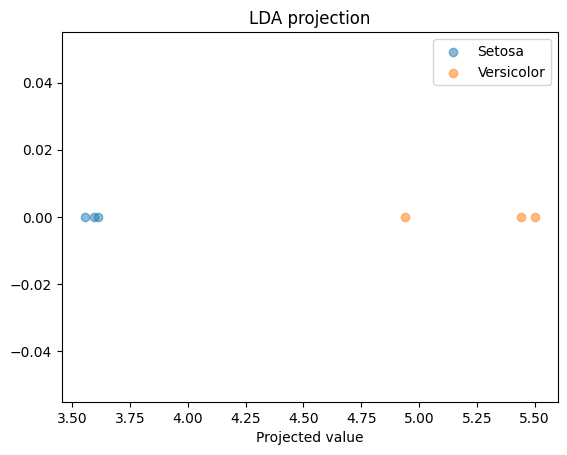

In [9]:
import matplotlib.pyplot as plt

# プロジェクションされたデータをプロット
plt.scatter(setosa_proj, np.zeros_like(setosa_proj), label='Setosa', alpha=0.5)
plt.scatter(versicolor_proj, np.zeros_like(versicolor_proj), label='Versicolor', alpha=0.5)
plt.legend()
plt.xlabel('Projected value')
plt.title('LDA projection')
plt.show()
